<a href="https://www.kaggle.com/code/wonduk/text-clustering-pca-eda-on-covid19-dataset?scriptVersionId=159639771" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: #00A300; color: white; padding: 14px; line-height: 1;border-radius:20px">💊Text Clustering & EDA on COVID-19🦠 Tweet Dataset</div>

![tweets](https://miro.medium.com/max/1400/1*hVyyXKWHskqeVxOXrMckLg.jpeg)

<h3 style="text-align: left; background-color: #9DBD48; color: white; padding: 14px; line-height: 1; border-radius:10px">About COVID-19🦠</h3>
<br>

```
Coronavirus disease 2019 (COVID-19) is a contagious disease caused by a virus, the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019. The disease quickly spread worldwide, resulting in the COVID-19 pandemic.

Symptoms of COVID‑19 are variable, but often include fever, cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste. Symptoms may begin one to fourteen days after exposure to the virus. -source: wikipedia
```

<h3 style="text-align: left; background-color: #9DBD48; color: white; padding: 14px; line-height: 1; border-radius:10px"> About Dataset📁</h3>
<br>

<b>Coronavirus tweets NLP Dataset</b> contains 6 columns, each are:

1. <mark><b>UserName</b></mark>: Name
2. <mark><b>ScreenName</b></mark>: Screen Name
3. <mark><b>Location</b></mark>: Tweeted from
4. <mark><b>TweetAt</b></mark>: Tweeted At
5. <mark><b>OriginalTweet</b></mark>: Twitter Text
6. <mark><b>Sentiment</b></mark>: Label

<h3 style="text-align: left; background-color: #9DBD48; color: white; padding: 14px; line-height: 1; border-radius:10px"> Notebook Objectives🔎</h3>

<br>
<b>Goal of the notebook is to</b>: 

1. 📊<mark><b>EDA on each columns</b></mark> <br>

2. 📃 <mark><b>Tweets Analysis </b></mark>(contains 3 parts: <b><mark>unigram</mark>, <mark>hashtags & mentions</mark>, <mark>each sentiments</mark></b>) <br>

3. 🗂<b>Text Clustering</b> using <mark><b>kmeans</b></mark> and <mark><b>PCA</b></mark> <br>


<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #9DBD48; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents📝</b></h3>
    
   * [1. Import necessary libraries](#1)
   * [2. Exploring each columns (univariate analysis)](#2)
    - [2.1. TweetAt](#2.1)
    - [2.2. Location](#2.2)
    - [2.3. Sentiment](#2.3)
    - [2.4. Tweet Length Distribution](#2.4)
   * [3. Tweets Text Analysis](#3)
    - [3.1. define functions](#3.1)  
    - [3.2. Unigram Analysis](#3.2)
        - [3.2.1. Visualize Unigrams using BarPlot📊](#3.2.1)
        - [3.2.2. Visualize Unigrams using WordCloud🔡](#3.2.2)
    - [3.3. Hash Tag & Mention Analysis](#3.3)
    - [3.4. Sentiments Analysis](#3.4)
   * [4. Tweets Text Preprocessing](#4)
        - [4.1. Text Cleaning](#4.1)  
        - [4.2. CountVectorizer](#4.2) 
        - [4.3. tf-idf transformer](#4.3) 
   * [5. Text Clustering](#5)
       - [5.1. Clustering before PCA](#5.1)
           - [5.1.1. Distortion Score Elbow before PCA](#5.1.1)
           - [5.1.2. Silhouette score of each k values before PCA](#5.1.2)
       - [5.2. Clustering after PCA](#5.2)
           - [5.2.1. Distortion Score Elbow after PCA](#5.2.1)
           - [5.2.2. Silhouette score of each k values after PCA](#5.2.2)
           - [5.2.3. Scatter plot on clusters](#5.2.3)
       - [5.3. Conclusion on clustering result](#5.3)

<a id="1"></a>
# <div style="text-align: center; background-color: #00D100; color: white; padding: 14px; line-height: 1;border-radius:20px"> 1. Import necessary libraries</div>

loading necessary libraries

In [1]:
# For Data
import pandas as pd
import numpy as np

#  For Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import missingno as msno
from wordcloud import WordCloud

# For NLP
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


# For Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# For Styling
plt.style.use('default')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


read csv file, and add column <mark><b>'Length'</b></mark> which stands for the <b>length of 'OriginalTweet'</b>.

In [2]:
df = pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_train.csv',encoding='latin-1')
df['TweetAt'] = pd.to_datetime(df['TweetAt'])
df['Length'] = df['OriginalTweet'].apply(len)
df.head(2)

UserName  ScreenName Location    TweetAt  \
0      3799       48751   London 2020-03-16   
1      3800       48752       UK 2020-03-16   

                                       OriginalTweet Sentiment  Length  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral     111  
1  advice Talk to your neighbours family to excha...  Positive     237

Text(0.5, 1.0, 'Missing values of each columns')

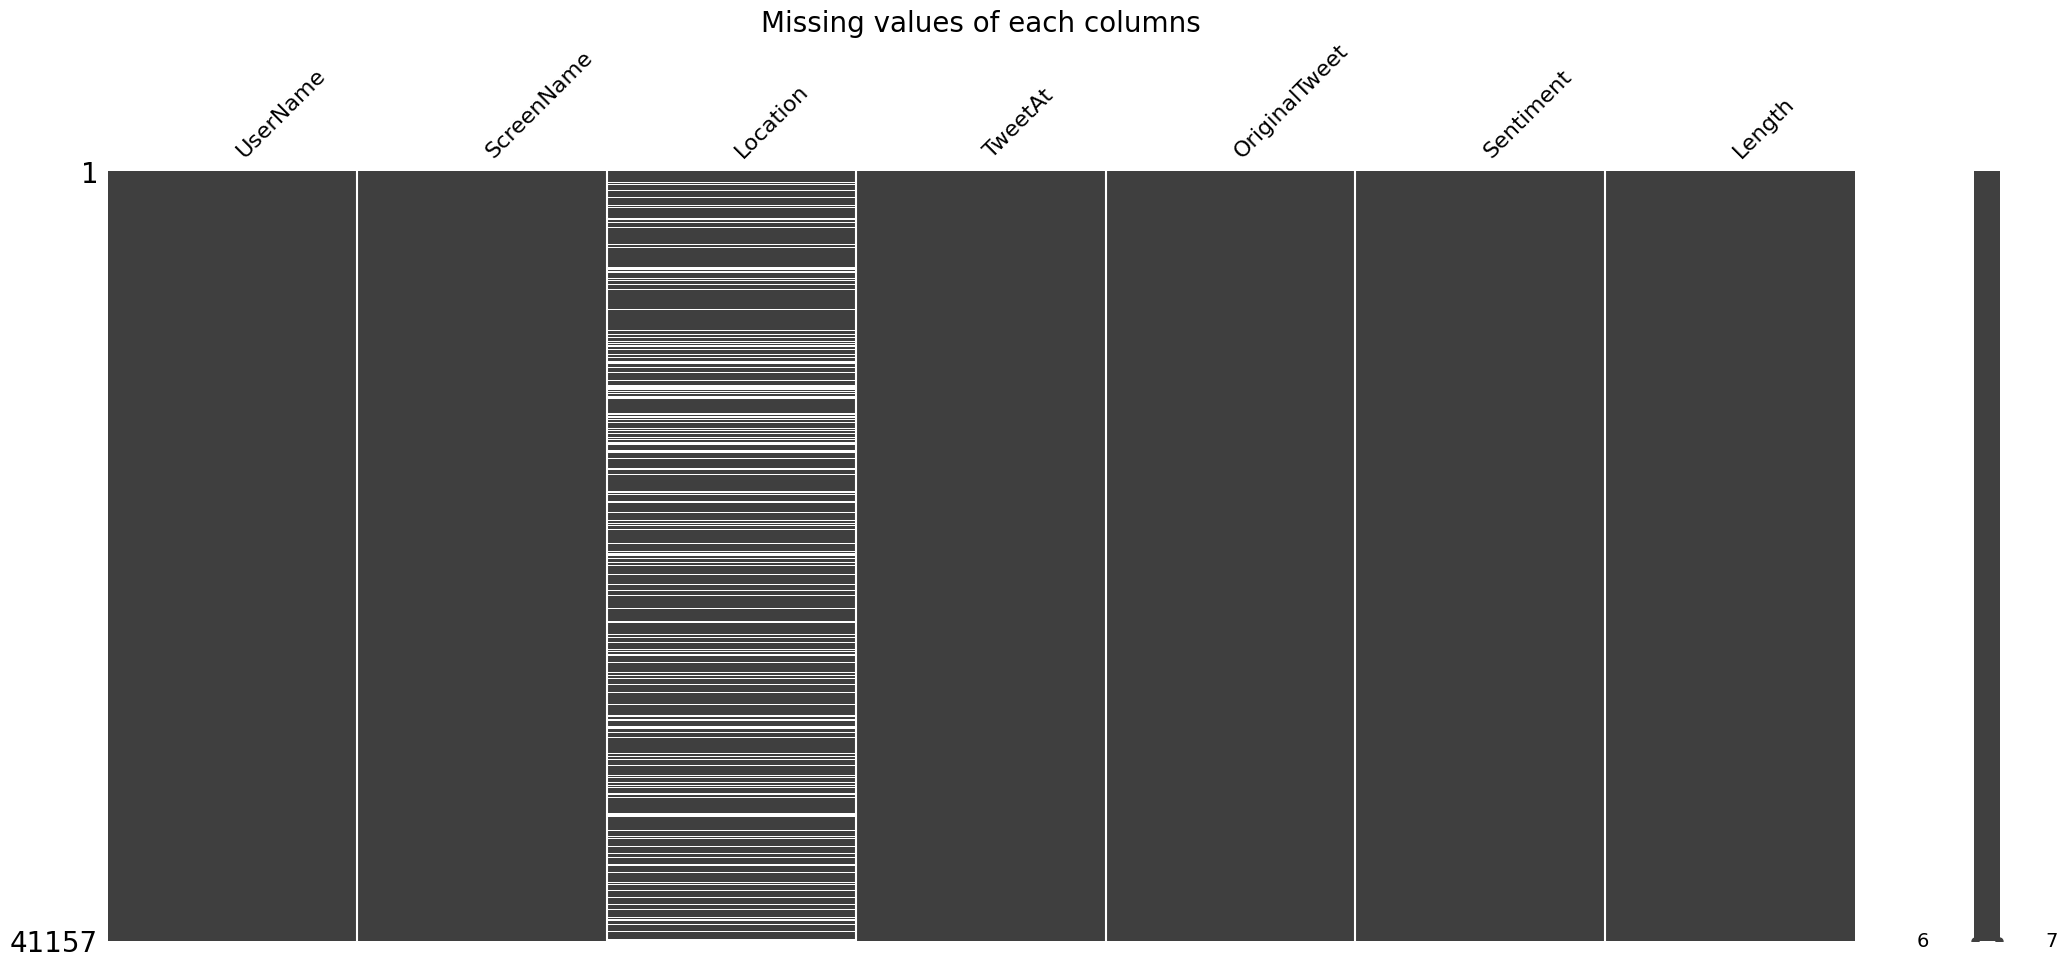

In [3]:
msno.matrix(df)
plt.title('Missing values of each columns',fontsize=20)

Easily seen that column <b>'Location'</b> consists of missing values.

<a id="2"></a>
# <div style="text-align: center; background-color: #00D100; color: white; padding: 14px; line-height: 1;border-radius:20px"> 2. Exploring each columns (univariate analysis)</div>

<h3> Explore each columns' distributions in the section. </h3>

<a id="2.1"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">2.1. TweetAt</div>

<b><mark>TweetAt</mark> stands for the time tweeted at.</b> <br>

<b>First, let's look into monthly distribution of tweets</b>:

Text(0.5, 1.0, 'Monthly distribution of tweets')

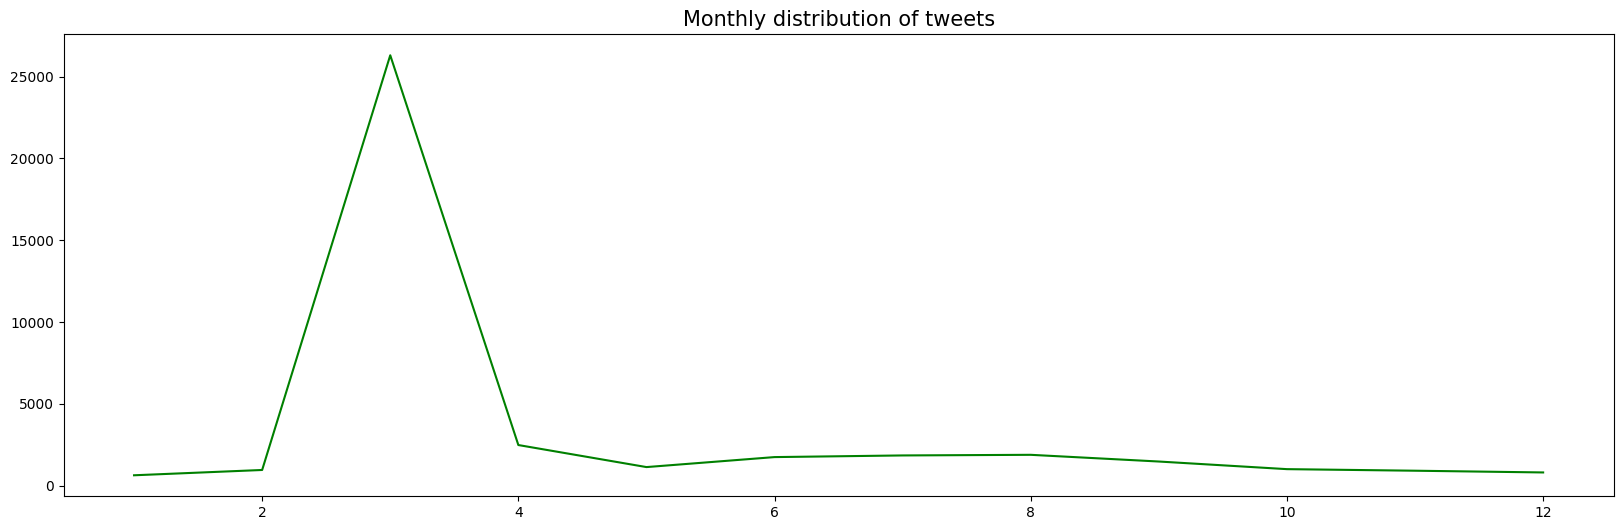

In [4]:
time = df.groupby(['TweetAt']).size()
monthly = df['TweetAt'].dt.month.value_counts().sort_index()
plt.figure(figsize=(20,6))
sns.lineplot(x=monthly.index, y = monthly.values, color='green')
plt.title('Monthly distribution of tweets', fontsize=15)

<b> We can notice that date of the dataset is mostly distributed in <mark>march</mark>;</b><br>
And below is the distribution of whole date

In [5]:
fig = px.line(df, 
              x=time.index, 
              y=time.values, 
              title = 'date of tweets',
              template='simple_white')

fig.update_layout(
    xaxis_title = 'Dates',
    yaxis_title = 'Count of Tweets',
    font=dict(size=17,family="Times New Roman"),)
fig.show()

<a id="2.2"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px"> 2.2. Location</div>

<b>Here we'll explore <mark>top 10 locations</mark> of tweets</b>:

In [6]:
location = df['Location'].value_counts()[:10]
fig = px.bar(x=location.index,y=location.values,text=location.values,
       color = location.index, color_discrete_sequence=px.colors.sequential.deep,
        title = 'Distribution of Top 10 Locations',
        template = 'simple_white')

fig.update_traces(textposition='inside',
                  textfont_size=11)

fig.update_layout(
    xaxis_title = 'Locations',
    yaxis_title = 'Count of Tweets',
    font=dict(size=17,family="Times New Roman"),)

fig.show()

<b>We can notice that<mark> UK and US</mark> ranked top 2 locations of covid-19 tweets, and<mark> India & Australia</mark> ranked the next.</b>

<a id="2.3"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">2.3. Sentiment</div>

In [7]:
sentiment = df["Sentiment"].value_counts()
fig = px.pie(values=sentiment.values, 
             names=sentiment.index,
             color_discrete_sequence=px.colors.sequential.Greens)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')
fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=12, 
                  uniformtext_mode='hide')

fig.show()

<b>There's 5 sentiments in the dataset: Positive, Negative, Neutral, Extremely Postive and Extremely Negative.<br>
Each <mark>Positive and Negative</mark> account for 27.8% and 24.1%</b>.

<a id="2.4"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">2.4. Tweet Length Distribution</div>

<b>Compare each sentiment's <mark>tweet length</mark> in this section</b>:

In [8]:
positive = df.loc[np.where(df['Sentiment'] == 'Positive')].reset_index()
negative = df.loc[np.where(df['Sentiment'] == 'Negative')].reset_index()
neutral = df.loc[np.where(df['Sentiment'] == 'Neutral')].reset_index()
extremely_positive = df.loc[np.where(df['Sentiment'] == 'Extremely Positive')].reset_index()
extremely_negative = df.loc[np.where(df['Sentiment'] == 'Extremely Negative')].reset_index()

In [9]:
hist_data = [extremely_positive['Length'],positive['Length'],neutral['Length'],
             negative['Length'],extremely_negative['Length']]

group_labels = ['extremely_positive','positive','neutral','negative','extremely_negative']

colors = ['navy', 'blue', 'lightblue','lightsalmon','red']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors = colors)

# Add title
fig.update_layout(title_text='Length distribution each sentiments', template = 'simple_white')
fig.show()

<b>It is obvious that sentiment of 'extremely negative' and 'extremely positive' mostly distributed at high length, and negative & positive the next.</b>

<a id="3"></a>
# <div style="text-align: center; background-color: #00D100; color: white; padding: 14px; line-height: 1;border-radius:20px">3. Tweets Text Analysis</div>

<b>Tweets Analysis section mainly consists of 4 parts, each are:</b>
* 1. Define Functions
* 2. Unigram Analysis
* 3. Hastag Analysis
* 4. Mention Analysis
* 5. Sentiment Analysis

<a id="3.1"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">3.1. define functions</div>

<b>Here i defined 11 functions: </b>

* 1.<b>get_all_str()</b>: get all strings
* 2.<b>get_str()</b>: get string from list
* 3.<b>get_word()</b>: get word from string
* 4.<b>get_hashtag()</b>: get text that contains hashtag
* 5.<b>get_mention()</b>: get text that contains mention
* 6.<b>stopword_list()</b>: to add stopword to list
* 7.<b>remove_stopword()</b>: remove stopword from list
* 8.<b>pos_remove_noun()</b>: remove noun
* 9.<b>lemmatization()</b>: lemmatize words
* 10.<b>Freq_df()</b>: get dataframe that involves terms and frequency
* 11.<b>Word_Cloud()</b>: generate wordcloud

In [10]:
def get_all_str(tweet):
    sentence = ''
    for words in tweet:
        sentence += words
    sentence = sentence.lower()
    return sentence

def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result

def get_hashtag(text):
    result = nltk.RegexpTokenizer(r'(?<=#)\w+').tokenize(text.lower())
    return result

def get_mention(text):
    result = nltk.RegexpTokenizer(r'(?<=@)\w+').tokenize(text.lower())
    return result 

def stopword_list(stop):
    lst = stopwords.words('english')
    for stopword in stop:
        lst.append(stopword)
    return lst

def remove_stopword(stopwords, lst):    
    stoplist = stopword_list(stopwords)
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
#     print(stoplist)
    return cleanwordlist

def pos_remove_noun(tagged):
    remove_noun = [word for word,pos in tagged if pos not in ['NN','NNS','NNP','NNPS']]
    txt = ''
    for i in range(len(remove_noun)):
        txt += remove_noun[i]
        txt += '\n'
    return cleanwordlist

def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
#     txt= ' '.join(tokens)
    return tokens

def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=50,
               colormap= colormap,
               max_font_size=140,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

<a id="3.2"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">3.2. Unigram Analysis</div>

<b> First, we'll explore <mark>stopwords removed</mark> ungirams.</b>

In [11]:
def whole_string(sent):
    all_str = get_all_str(sent)
    words = get_word(all_str)
    removed = remove_stopword(['http','https','co'],words)
    freq_df = Freq_df(removed)
    return freq_df

<a id="3.2.1"></a>
### <div style="text-align: left; background-color:#59981A; color: white; padding: 14px; line-height: 1;border-radius:5px">3.2.1. Visualize Unigrams using BarPlot📊</div>

In [12]:
freq_df = whole_string(df['OriginalTweet'])
top_10 = freq_df[:10]

fig = px.bar(top_10, x = 'Term', y = 'Frequency',text = 'Frequency', color='Term',
             color_discrete_sequence=px.colors.sequential.PuBuGn, title = 'Rank of terms',
             template = 'simple_white')
    
fig.update_traces(textposition='inside',
                  textfont_size=11)
fig.show()

<b>We can see that 'coronavirus', '19' and 'covid' achieved rank of top 3 frequent terms.<br> 
Also 'prices', 'food' and 'supermarket' ranked the next. <br>
I guess this is due to <mark>food shortage</mark> at that time. </b>

<a id="3.2.2"></a>
### <div style="text-align: left; background-color:#59981A; color: white; padding: 14px; line-height: 1;border-radius:5px">3.2.2. Visualize Unigrams using WordCloud🔡</div>

<b> Generate WordCloud below:</b>

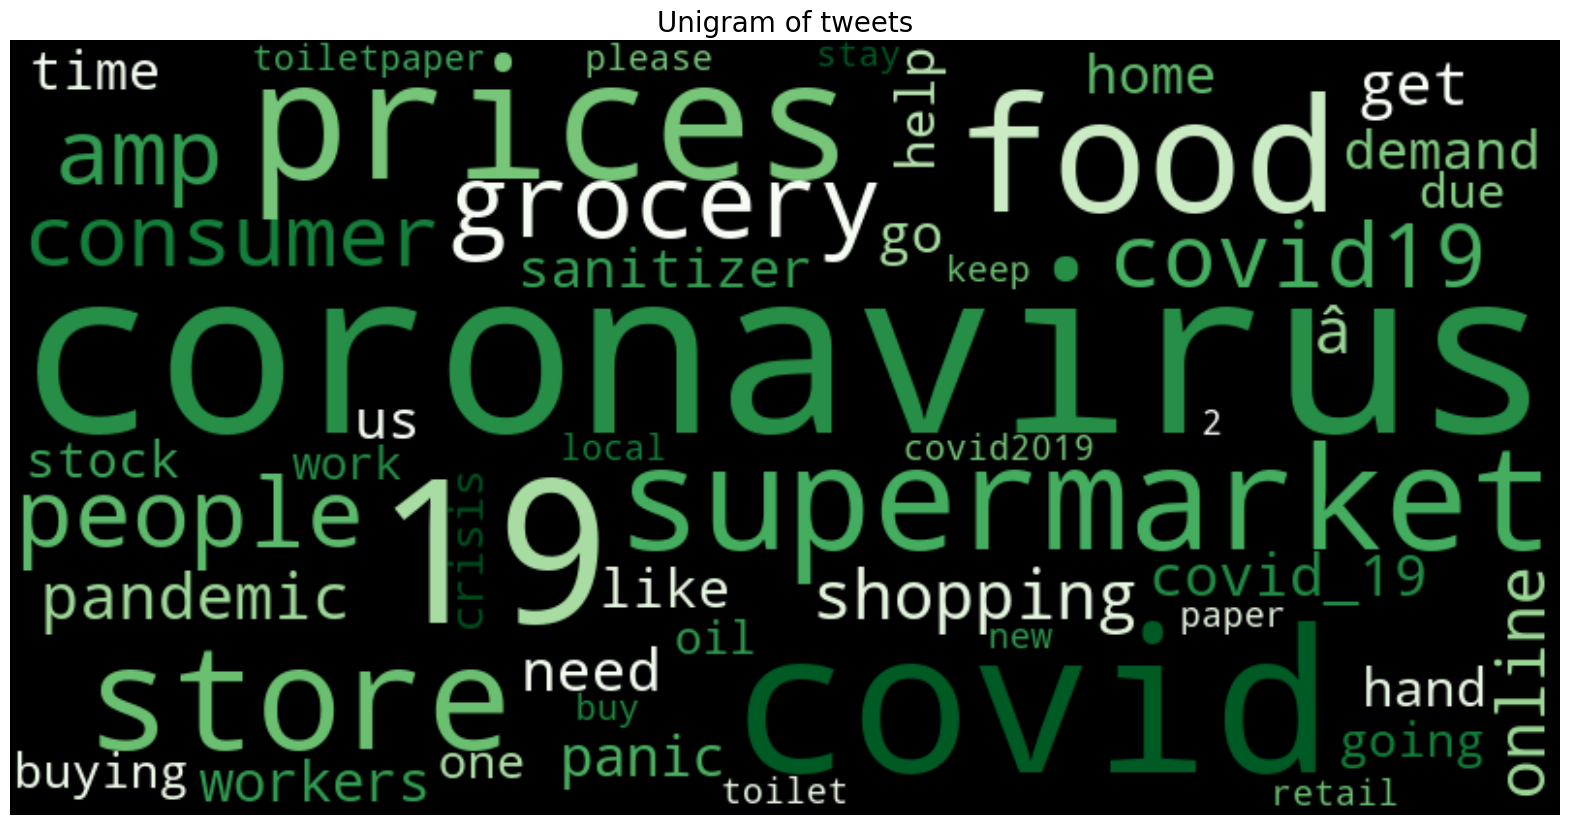

In [13]:
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black', 'Greens_r', 'Unigram of tweets')

<b>Main topics are about covid and <mark>food supplement</mark></b>.

<a id="3.3"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px"> 3.3. Hash Tag & Mention Analysis </div>

<b>Explore text that contains hashtag and mention with generating WordCloud</b>:

In [14]:
def hashtag(sent):
    all_str = get_all_str(sent)
    words = get_hashtag(all_str)
    removed = remove_stopword(['http','https','co'],words)
    freq_df = Freq_df(removed)
    return freq_df

def mention(sent):
    all_str = get_all_str(sent)
    words = get_mention(all_str)
    removed = remove_stopword(['http','https','co'],words)
    freq_df = Freq_df(removed)
    return freq_df
hashtag_df = hashtag(df['OriginalTweet'])
mention_df = mention(df['OriginalTweet'])

In [15]:
def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (10,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=50,
               colormap= colormap,
               max_font_size=140,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

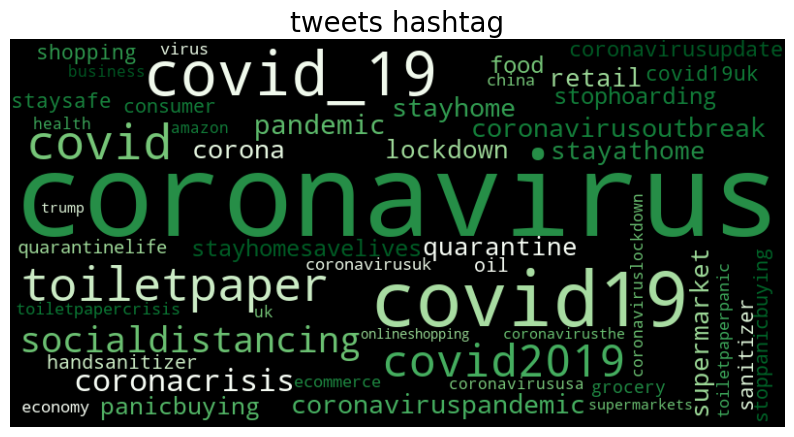

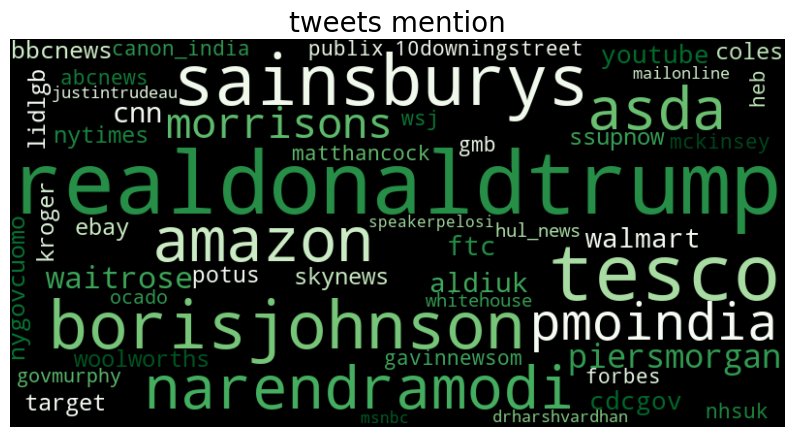

In [16]:
hashtag = hashtag_df.set_index('Term').to_dict()['Frequency']
mention = mention_df.set_index('Term').to_dict()['Frequency']
Word_Cloud(hashtag ,'black', 'Greens_r', 'tweets hashtag')
Word_Cloud(mention ,'black', 'Greens_r', 'tweets mention')

<b> Most of hashtags are about covid, also contain keywords as <mark>'socialdistancing', 'stayathome', 'lockdown'</mark>, and mentions as above</b>.

<a id="3.4"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">3.4. Sentiments Analysis</div>

<b>We'll plot wordclouds for each sentiments here:</b>

In [17]:
positive_df = whole_string(positive['OriginalTweet'])
negative_df = whole_string(negative['OriginalTweet'])
neutral_df = whole_string(neutral['OriginalTweet'])
extremely_positive_df = whole_string(extremely_positive['OriginalTweet'])
extremely_negative_df = whole_string(extremely_negative['OriginalTweet'])

In [18]:
# data = dict(zip(positive_df['Term'].tolist(), positive_df['Frequency'].tolist()))
expost = extremely_positive_df.set_index('Term').to_dict()['Frequency']
post= positive_df.set_index('Term').to_dict()['Frequency']
neut = neutral_df.set_index('Term').to_dict()['Frequency']
nega = negative_df.set_index('Term').to_dict()['Frequency']
exnega = extremely_negative_df.set_index('Term').to_dict()['Frequency']

In [19]:
# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (15,6))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=50,
               colormap= colormap,
               max_font_size=140,
#                min_font_size = 2,
               random_state=8888, 
               background_color=color_background,).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')

    plt.title(title, fontsize=20)
    plt.axis('off')
#     plt.show()

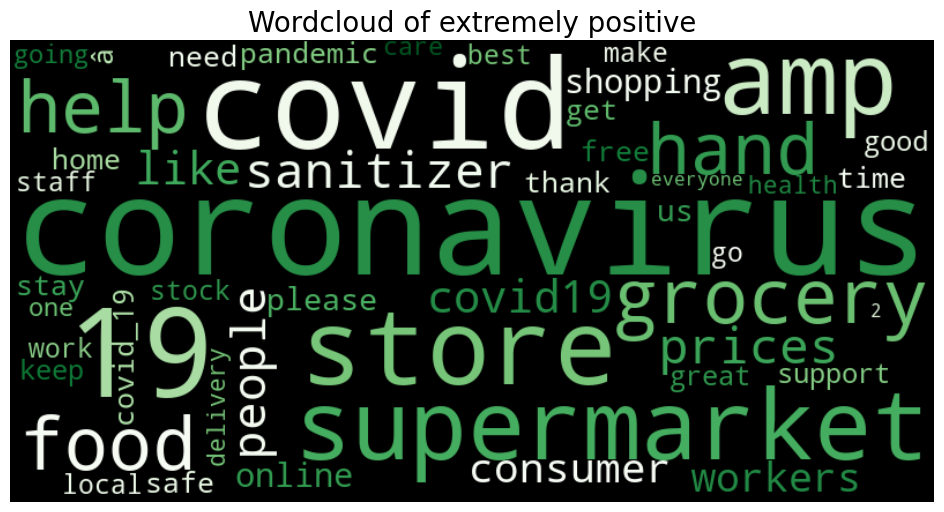

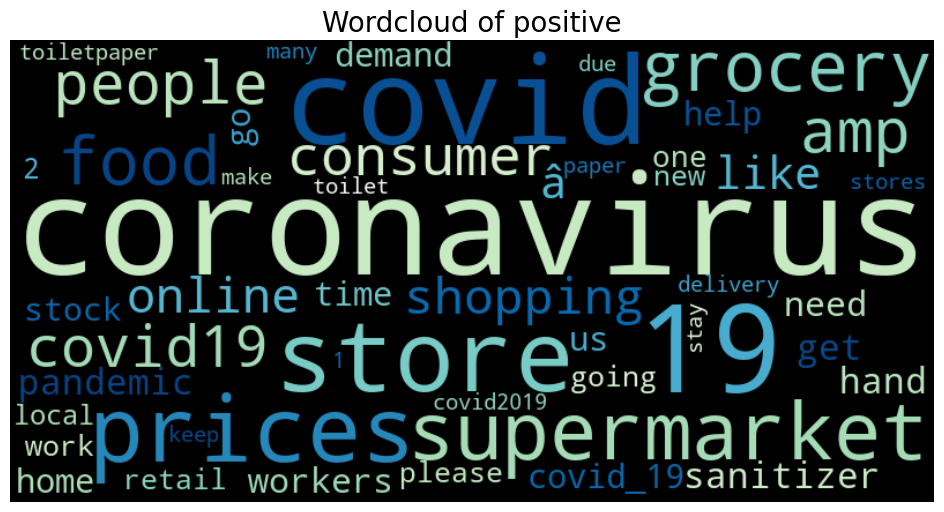

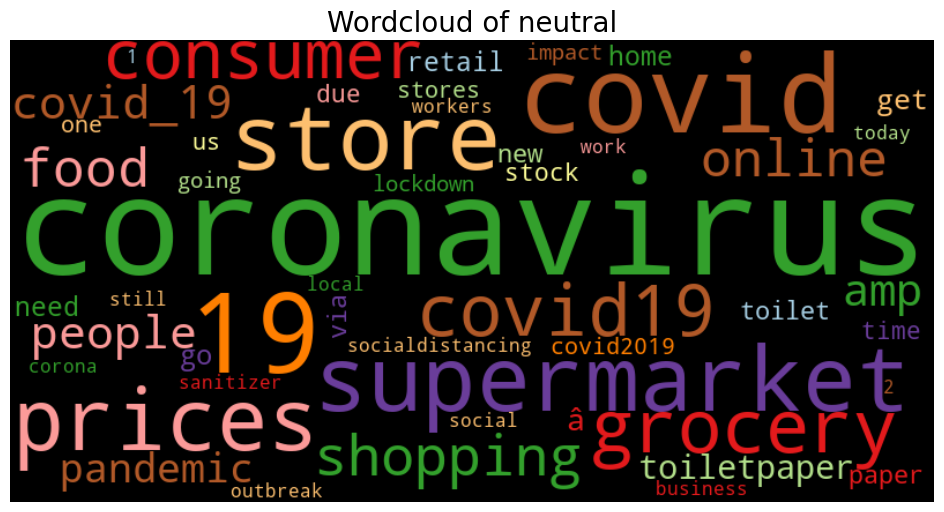

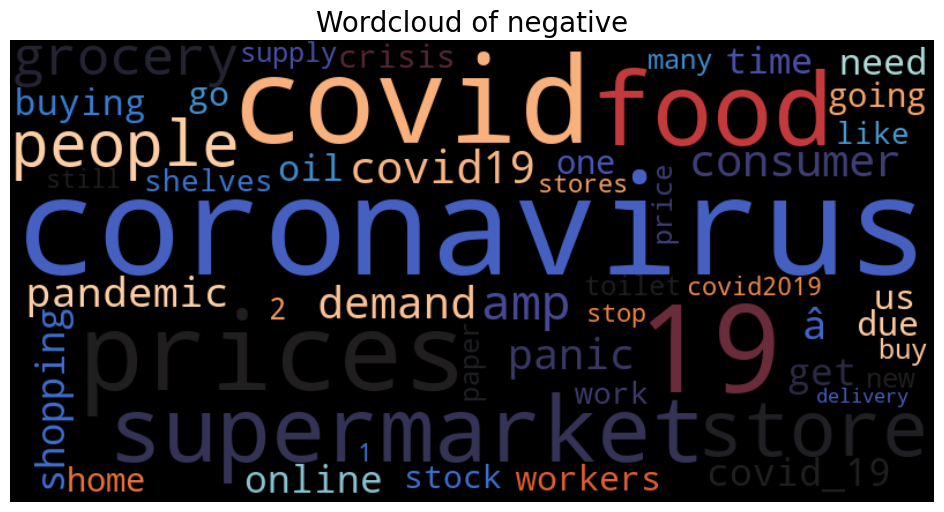

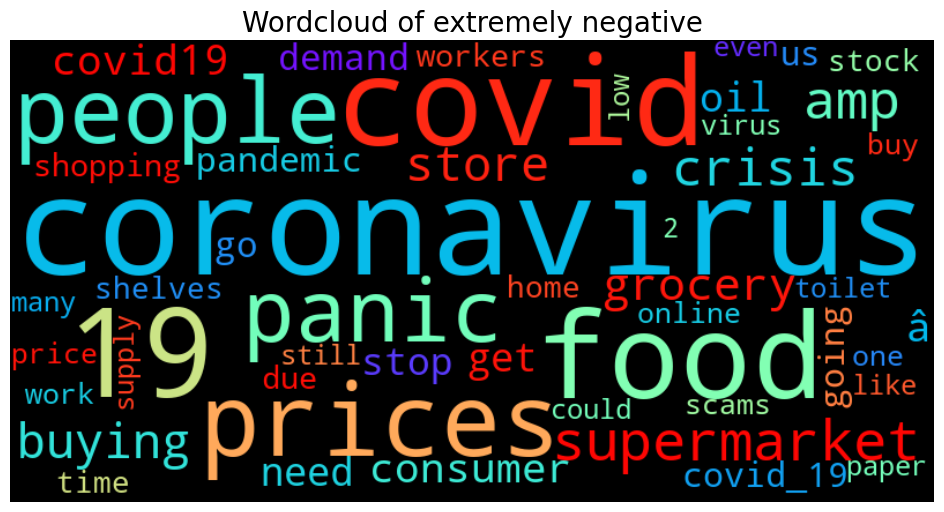

In [20]:
Word_Cloud(expost ,'black', 'Greens_r', 'Wordcloud of extremely positive')
Word_Cloud(post ,'black', 'GnBu', 'Wordcloud of positive')
Word_Cloud(neut ,'black', 'Paired', 'Wordcloud of neutral')
Word_Cloud(nega ,'black', 'icefire', 'Wordcloud of negative')
Word_Cloud(exnega ,'black', 'rainbow', 'Wordcloud of extremely negative')

<a id="4"></a>
# <div style="text-align: center; background-color: #00D100; color: white; padding: 14px; line-height: 1;border-radius:20px">4. Tweets Text Preprocessing</div>

<b>In this section, we'll convert text data into <mark>machine-readable vector</mark> used for text clustering section</b>.

<b>3 main parts in the section</b>:<br>
* 1. <mark>Text cleaning</mark> (remove & lemmatize text data);
* 2. <mark>CountVectorizer</mark>;
* 3. <mark>TfidfTransformer</mark>

<a id="4.1"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">4.1. Text Cleaning</div>

I chose the first 15000 data for clustering:

In [21]:
df = df[:15000]
def preprocessing(text):
    words = get_word(text)
    lemma = lemmatization(words)
    removed = remove_stopword(['http','ly'],lemma)
    return removed
df['OriginalTweet'] = df['OriginalTweet'].apply(preprocessing)
df['OriginalTweet'] = df['OriginalTweet'].apply(get_str)

In [22]:
print(df.shape)
df.tail(5)

(15000, 7)


UserName  ScreenName              Location    TweetAt  \
14995     18794       63746  University of Surrey 2020-03-22   
14996     18795       63747   Birmingham, England 2020-03-22   
14997     18796       63748   Tipperary, Ireland. 2020-03-22   
14998     18797       63749               British 2020-03-22   
14999     18798       63750               Alberta 2020-03-22   

                                           OriginalTweet           Sentiment  \
14995                      still donâ get co voduhdwo99              Neutral   
14996  chaotic scene supermarket shopper heeding advi...  Extremely Negative   
14997  roaring 20 ha brought covid_19 illness stock m...            Negative   
14998  potus must follw danish british economic model...  Extremely Negative   
14999  jaimeekara demand certain good including hand ...            Positive   

       Length  
14995      60  
14996     233  
14997     207  
14998     255  
14999     255

cleaned successfully.

<a id="4.2"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">4.2. CountVectorizer</div>

<b><mark>CountVectorizer</mark> is used to convert text documents to a vector of term counts</b>.

In [23]:
vector = CountVectorizer()
X = vector.fit(df['OriginalTweet'])
X_transform = X.transform(df['OriginalTweet'])

In [24]:
print(X_transform.shape)
pd.DataFrame(X_transform.toarray(), columns=vector.get_feature_names()).head(5)

(15000, 33877)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



00  000  0000009375  0000hrs  000francs  000s  008  00am  00hrs  \
0   0    0           0        0          0     0    0     0      0   
1   0    0           0        0          0     0    0     0      0   
2   0    0           0        0          0     0    0     0      0   
3   0    0           0        0          0     0    0     0      0   
4   0    0           0        0          0     0    0     0      0   

   00pdsup4wb  ...  zyocje8e18  zyrmiro9cq  zyxg2qqvkx  zz7gjzlvns  \
0           0  ...           0           0           0           0   
1           0  ...           0           0           0           0   
2           0  ...           0           0           0           0   
3           0  ...           0           0           0           0   
4           0  ...           0           0           0           0   

   zzczwfp7ih  zzkxpxsnuh  zzsmn5qjla  zzz  zã  zã¼rich  
0           0           0           0    0   0        0  
1           0           0           0    0   0        0  
2           0           0           0    0   0        0  
3           0           0           0    0   0        0  
4           0           0           0    0   0        0  

[5 rows x 33877 columns]

<a id="4.3"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">4.3. TfidfTransformer</div>

<b>Transform a count matrix to a <mark>normalized tf-idf</mark> representation</b>.

In [25]:
Tfidf = TfidfTransformer()
tfidf_transformer = Tfidf.fit(X_transform)
X = tfidf_transformer.transform(X_transform)

In [26]:
print(X.shape)
df_tfidf = pd.DataFrame(X.toarray(), columns=vector.get_feature_names())
df_tfidf.head(5)

(15000, 33877)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



00  000  0000009375  0000hrs  000francs  000s  008  00am  00hrs  \
0  0.0  0.0         0.0      0.0        0.0   0.0  0.0   0.0    0.0   
1  0.0  0.0         0.0      0.0        0.0   0.0  0.0   0.0    0.0   
2  0.0  0.0         0.0      0.0        0.0   0.0  0.0   0.0    0.0   
3  0.0  0.0         0.0      0.0        0.0   0.0  0.0   0.0    0.0   
4  0.0  0.0         0.0      0.0        0.0   0.0  0.0   0.0    0.0   

   00pdsup4wb  ...  zyocje8e18  zyrmiro9cq  zyxg2qqvkx  zz7gjzlvns  \
0         0.0  ...         0.0         0.0         0.0         0.0   
1         0.0  ...         0.0         0.0         0.0         0.0   
2         0.0  ...         0.0         0.0         0.0         0.0   
3         0.0  ...         0.0         0.0         0.0         0.0   
4         0.0  ...         0.0         0.0         0.0         0.0   

   zzczwfp7ih  zzkxpxsnuh  zzsmn5qjla  zzz   zã  zã¼rich  
0         0.0         0.0         0.0  0.0  0.0      0.0  
1         0.0         0.0         0.0  0.0  0.0      0.0  
2         0.0         0.0         0.0  0.0  0.0      0.0  
3         0.0         0.0         0.0  0.0  0.0      0.0  
4         0.0         0.0         0.0  0.0  0.0      0.0  

[5 rows x 33877 columns]

In [27]:
X

<15000x33877 sparse matrix of type '<class 'numpy.float64'>'
	with 285931 stored elements in Compressed Sparse Row format>

<a id="5"></a>
# <div style="text-align: center; background-color: #00D100; color: white; padding: 14px; line-height: 1;border-radius:20px">5. Text Clustering</div>

<b>We'll cluster converted data in this section, using Kmeans clustering.
    Mainly <u>three parts</u> in the section, each are:</b>
* 1. <mark>Kmeans clustering</mark> (elbow, silhoutte scoring);
* 2. <mark>PCA</mark> to reduce dimension of vector;
* 3. Kmeans clustering <mark>after PCA</mark>

<a id="5.1"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">5.1. Clustering before PCA</div>

<b style='color:blue'>k-means clustering</b> is a method of vector quantization, originally from signal processing, <br>that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean <br>(cluster centers or cluster centroid), serving as a prototype of the cluster. - source: wikipedia

<a id="5.1.1"></a>
### <div style="text-align: left; background-color:#18A558; color: white; padding: 14px; line-height: 1;border-radius:5px">5.1.1. Distortion Score Elbow before PCA</div>

<b style='color:blue'>Elbow method</b> is to select the <mark>optimal number of clusters</mark> by fitting the model with a range of values for k.

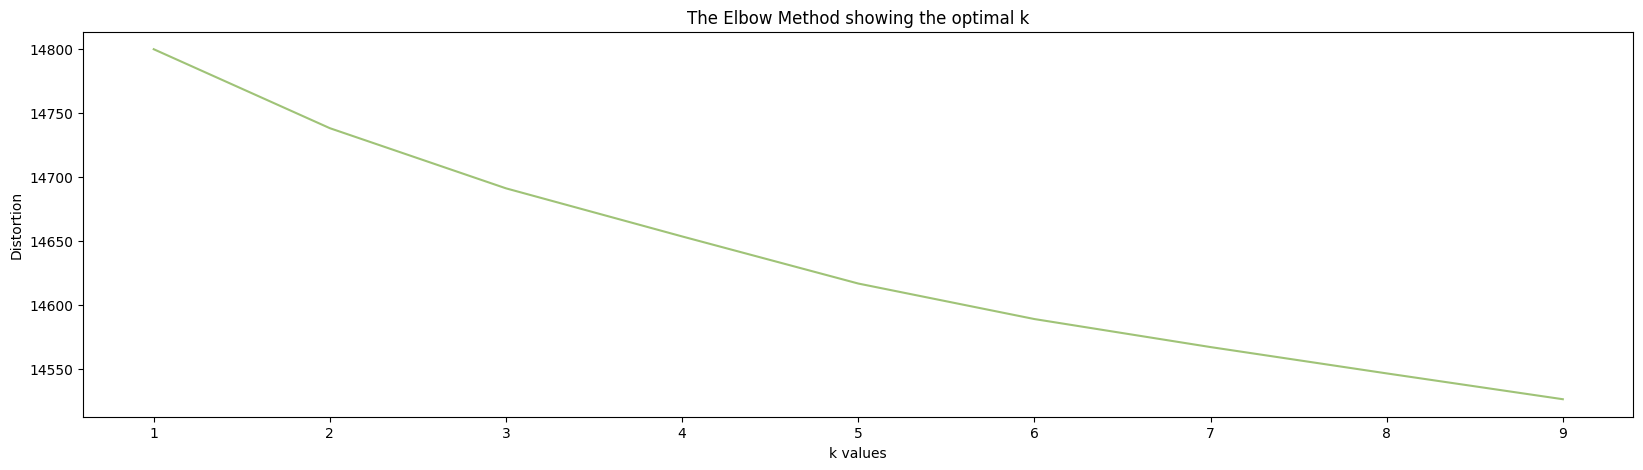

In [28]:
distortions = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k,random_state=7)
    kmean.fit(X)
    distortions.append(kmean.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, distortions, '-',color='g')
plt.xlabel('k values')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<b>The line is so smooth (no elbow) that it is quite hard to find optimal k value. <br>
Thus we'll look into silhouette score of each k values next</b>.

<a id="5.1.2"></a>
### <div style="text-align: left; background-color:#18A558; color: white; padding: 14px; line-height: 1;border-radius:5px">5.1.2. Silhouette score of each k values before PCA</div>

<b style='color:blue'>The silhouette value</b> is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).<br> The silhouette ranges from −1 to +1, <br>where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 

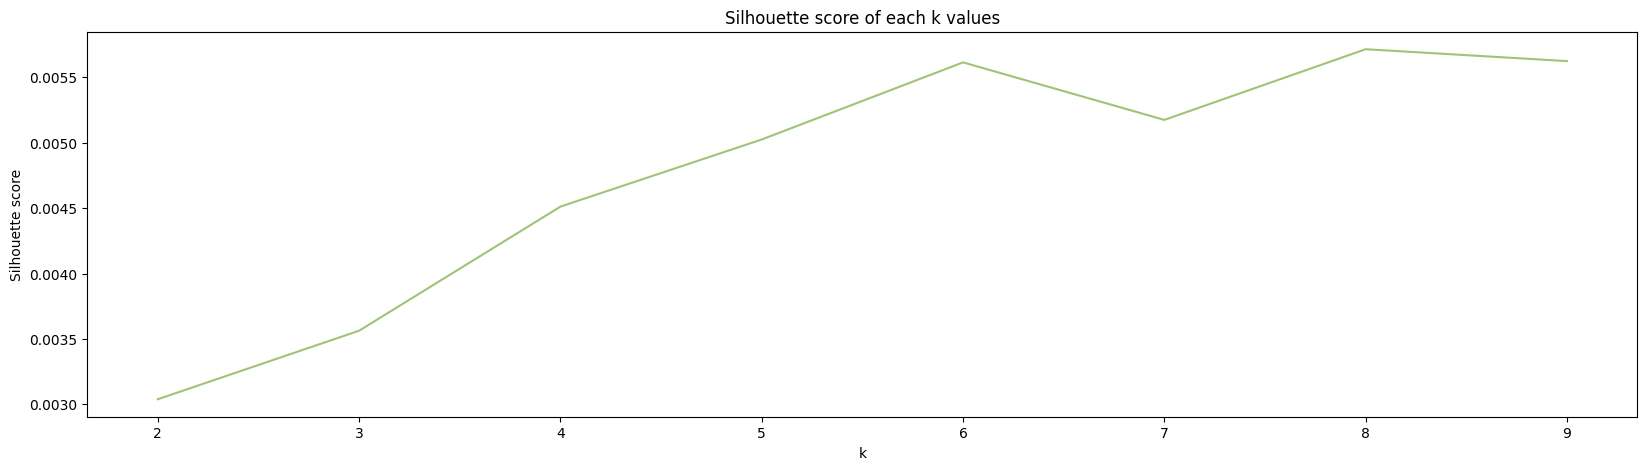

In [29]:
K = range(2,10)
silhouette = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    preds = kmeanModel.predict(X)
    silhouette.append(silhouette_score(X, preds))
    
plt.figure(figsize=(20,5))
plt.plot(K, silhouette, '-',color='g')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score of each k values')
plt.show()

<b>Since high dimension on data, silhouette scores are too low. Thus we'll use PCA method to <mark>reduce dimension</mark> into 2 in the next section.</b>

<a id="5.2"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">5.2. Clustering after PCA</div>

<b style='color:blue'>Principal component analysis (PCA)</b> is the process of computing the principal components and using them to perform a change of basis on the data,<br> sometimes using only the first few principal components and ignoring the rest.

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCA = pca.fit(X.toarray())
X_pca = pca.transform(X.toarray())

<a id="5.2.1"></a>
### <div style="text-align: left; background-color:#18A558; color: white; padding: 14px; line-height: 1;border-radius:5px">5.2.1. Distortion Score Elbow after PCA</div>

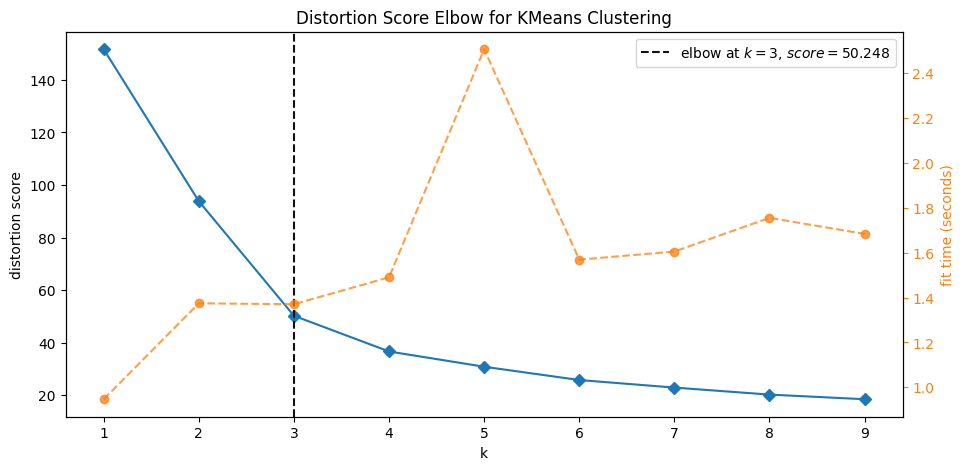

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10),size=(1080, 500))

visualizer.fit(X_pca)        
visualizer.show() 

<b> Now we found that optimal <mark>k vlaue is 3</mark>, let's look into silhouette score below</b>:

<a id="5.2.2"></a>
### <div style="text-align: left; background-color:#18A558; color: white; padding: 14px; line-height: 1;border-radius:5px">5.2.2. Silhouette score of each k values after PCA</div>

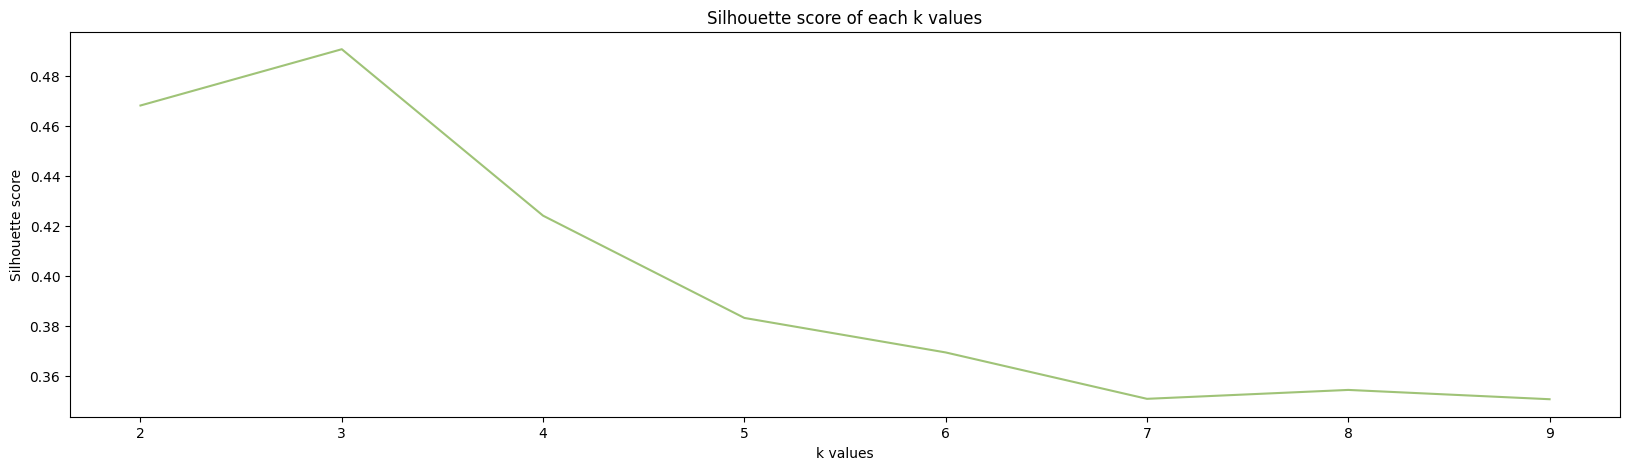

In [32]:
silhouette = []
K = range(2,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca)
    preds = kmeanModel.predict(X_pca)
    silhouette.append(silhouette_score(X_pca, preds))
    
plt.figure(figsize=(20,5))
plt.plot(K, silhouette, '-',color='g')
plt.xlabel('k values')
plt.ylabel('Silhouette score')
plt.title('Silhouette score of each k values')
plt.show()

<b>We can notice that silhouette score has improved, and the best score is at k = 3, <mark>about 0.5</mark></b>.

<a id="5.2.3"></a>
### <div style="text-align: left; background-color:#18A558; color: white; padding: 14px; line-height: 1;border-radius:5px">5.2.3. Scatter plot on clusters</div>

In [33]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_pca)
pred_labels = kmeanModel.labels_;
pred_centers = kmeanModel.cluster_centers_
df_centers = pd.DataFrame(pred_centers, columns=['x', 'y'])
df_centers.head(1)

x         y
0  0.118967 -0.036072

In [34]:
dfcl = pd.DataFrame(columns=['x','y','label'])
dfcl['x'] = X_pca[:,0]
dfcl['y'] = X_pca[:,1]
dfcl['label'] = kmeanModel.labels_
dfcl.head(1)

x         y  label
0 -0.053905 -0.058372      2

<b><mark>Scatter plot</mark> as below:</b>.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'scatter plot')

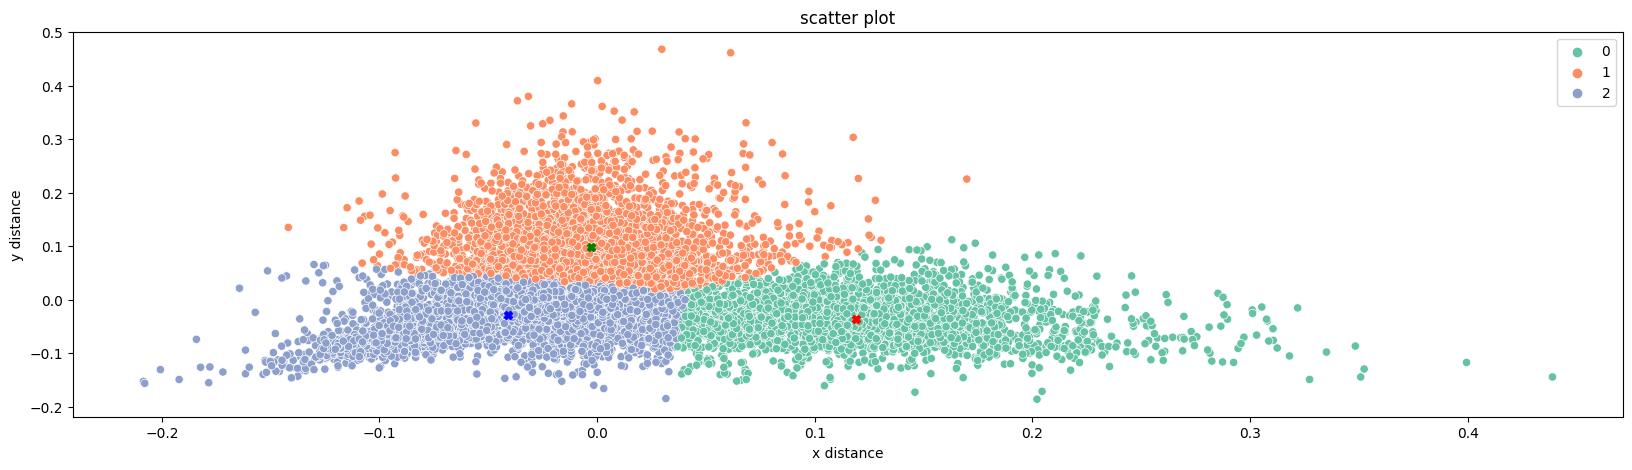

In [35]:
plt.figure(figsize=(20,5))

sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=pred_labels.tolist(),palette='Set2')
colors = ['red', 'green', 'blue', 'yellow']

for i,color in enumerate(df_centers.index.tolist()):
    plt.plot(df_centers['x'][i], df_centers['y'][i], 'X', label='K-means center: %d' % i, color=colors[i])
plt.xlabel('x distance')
plt.ylabel('y distance')
plt.title('scatter plot')

<a id="5.3"></a>
## <div style="text-align: left; background-color:#81B622; color: white; padding: 14px; line-height: 1;border-radius:10px">5.3. Conclusion on clustering result</div>

<b>Create <mark>frequent terms dataframe</mark> for each labels</b>:

In [36]:
df['label'] = pred_labels
df = df[['OriginalTweet','label']]
label1 = df[df['label']==0]
label2 = df[df['label']==1]
label3 = df[df['label']==2]
words1 = get_word(get_all_str(label1['OriginalTweet']))
words2 = get_word(get_all_str(label2['OriginalTweet']))
words3 =  get_word(get_all_str(label3['OriginalTweet']))
df1 = Freq_df(words1)
df2 = Freq_df(words2)
df3 = Freq_df(words3)

<b> Visualize<mark> top 20 frequent</mark> words with bar plot: </b>

In [37]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='label0', x=df1['Term'][:20].values, y=df1['Frequency'][:20].values,text=df1['Frequency'][:20].values,marker_color='blue'),
    go.Bar(name='label1', x=df2['Term'][:20].values, y=df2['Frequency'][:20].values,text=df1['Frequency'][:20].values,marker_color='yellow'),
    go.Bar(name='label2', x=df3['Term'][:20].values, y=df3['Frequency'][:20].values,text=df1['Frequency'][:20].values,marker_color='red')
])
fig.update_layout(barmode='stack', xaxis_tickangle=-45,title='top 20 frequent terms on each clusters', template='simple_white')

fig.show()

<h2> <u>Conclusion:</u> </h2><br>


<h4><b style='color:blue'>First cluster</b> (label0) mostly consists of terms like <mark>store, grocery, worker, work</mark>. </h4><br>

<h4><mark><b>Second cluster</b></mark> (label1) mostly consists of terms such as <mark>food, supermarket, panic, buying, supply</mark>;</h4><br>
    
<h4><b style = 'color:red'>Third cluster</b> (label2) mostly consists of terms as <mark>price, consumer, online, shopping, business</mark>;</h4><br>

<h1 style= 'text-align: center; color: blue'> 🙇Thanks For Watching ! -wonduk </h1>